<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h2><FONT COLOR="#FF0000"> Integrantes: Melania Omonte, Máximo Zoppini y Flavio Olivier</FONT></h2>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
dataset = pandas.read_csv('C:\Diplomatura\DataSets\hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [4]:
dataset.columns.values  # Way too many columns!

array(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap', 'pf_ss_disappearances_violent',
       'pf_ss_disappearances_organized',
       'pf_ss_disappearances_fatalities', 'pf_ss_disappearances_injuries',
       'pf_ss_disappearances', 'pf_ss_women_fgm', 'pf_ss_women_missing',
       'pf_ss_women_inheritance_widows',
       'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance',
       'pf_ss_women', 'pf_ss', 'pf_movement_domestic',
       'pf_movement_foreign', 'pf_movement_women', 'pf_movement',
       'pf_religion_estop_establish', 'pf_religion_estop_operate',
       'pf_religion_estop', 'pf_religion_harassment',
       'pf_religion_restrictions', 'pf_religion',
       'pf_association_association', 'pf_association_assembly',
       'pf_association_political_establish',
       'pf_association_political_operate', 'pf_association_political',
       'pf_associ

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [6]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

#### 1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [7]:
#Calculamos estadísticos de las principales variables.

#dataset[important_cols].describe()
dataset_ic = dataset[important_cols].copy()
dataset_ic.describe()

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
count,1458.000000,205.000000,923.000000,923.000000,1358.000000,1375.000000,1378.000000,1378.000000,585.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,6.307317,7.248104,7.632719,7.428203,6.709091,7.935414,7.325835,7.538462,7.334180,6.785610,76.973149,6.993444,77.007983
std,2.582875,3.635095,3.953387,3.689772,3.705913,4.683089,4.028877,4.048606,3.644142,3.159473,0.883601,44.540142,1.025811,44.506549
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.880000,1.000000,3.765827,1.000000
25%,2010.000000,7.000000,5.000000,5.000000,5.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.250000,38.000000,6.336685,39.000000
50%,2012.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.166667,6.900000,77.000000,6.923840,76.000000
75%,2014.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.410000,115.000000,7.894660,115.000000
max,2016.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.190000,162.000000,9.126313,162.000000


In [8]:
#Observamos el rango de las principales variables.

dataset_ic.agg(['min', 'max'])

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
min,2008,AGO,Albania,Caucasus & Central Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.88,1.0,3.765827,1.0
max,2016,ZWE,Zimbabwe,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.19,162.0,9.126313,162.0


In [9]:
#Este rango de variables nos permite obtener una idea de la dispersión de los datos, 
#lo que podemos observar para este caso, es que existe una gran amplitud en los mismos, 
#lo que significa q existe un gran dispersion. 

#### 2. Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. 

In [10]:
#Calculamos media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo.

dataset_ic[['pf_identity','hf_score']].agg(['mean', 'median', 'std'])

,pf_identity,hf_score
mean,7.334180,6.993444
median,9.166667,6.923840
std,3.159473,1.025811


In [11]:
#Calculamos media, mediana y desviación estándar de las variables pf_identity y hf_score en Latin America & the Caribbean.

dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean'][['pf_identity','hf_score']].agg(['mean', 'median', 'std'])

,pf_identity,hf_score
mean,8.765086,7.047982
median,10.000000,7.028045
std,1.711732,0.608904


In [12]:
#Puntuacion de Libertad Humana e Identidad de Libertad Personal (hf_score & pf_identity)
#Lo que observamos de estos estadisticos descriptivos,es que Latinoamérica y el caribe tiene una media, 
#mediana mayor que la media mundial, con respecto a la desviación, tiene menor desviación estándar, 
#esto seguramente se debe a que no existen diferencias muy extremas entre sus países, 
#a diferencia del mundo entero, donde si existen extremos muy desiguales.

#Calcular la MODA sobre variables continuas sin aplicar intervalos de clases (modales) no tendría sentido.



#### 3. ¿Son todos los valores de pf_identity y hf_score directamente comparables? ¿Qué otra variable podría influenciarlos?

In [13]:
#Los valores de pf_identity y hf_score son comparables aunque la segunda depende de la primera, a saber:

#hf_score se construye promediando: pf_score + ef_score.
#pf_score se construye promediando: pf_rol + pf_ss + pf_movement + pf_religion + pf_association + fp_expression + pf_identity.
#pf_identity se construye promediando: pf_identity_legal + pf_identity_parental + pf_identity_sex + pf_identity_divorce.

#... todas las variables económicas (ef_) podrían influenciar.

#### 4. ¿Cómo pueden sanearse los valores faltantes?

In [14]:
#Se podrían reemplazar promediando valores existentes entre países que forman parte de la región.

#### 5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

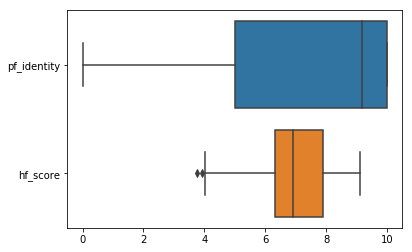

In [15]:
#Para observar valores atípicos hechamos mano al gráfico de caja...

data = dataset_ic[['pf_identity','hf_score']]
seaborn.boxplot(data = data, orient="h")

plt.show()

In [16]:
#Lo que podemos observar de estos outliers es que el campo pf_identity posee mas valores o datos mas extraños
#Por lo tanto deberiamos poner mas enfasis en analizar los mismo, ver si vamos sanear los outliers de pf_identity, 
#o si vamos eliminar los mismos.

In [17]:
#... y los podemos obtener utilizando el Rango Intercuartílico:

# vMin = Q1 - 1.5 * (RI)
# vMax = Q3 + 1.5 * (RI)

In [18]:
#Observamos Q1 y Q3 de ambas variables:

print(data.quantile(0.25))
print()
print(data.quantile(0.75))

pf_identity    5.000000
hf_score       6.336685
Name: 0.25, dtype: float64

pf_identity    10.00000
hf_score        7.89466
Name: 0.75, dtype: float64


In [19]:
#Calculamos límites para Valores atípicos:

AtMin_pf_identity = data.quantile(0.25)[0] - (1.5 * (data.quantile(0.75)[0] - data.quantile(0.25)[0]))
AtMax_pf_identity = data.quantile(0.75)[0] + (1.5 * (data.quantile(0.75)[0] - data.quantile(0.25)[0]))

AtMin_hf_score = data.quantile(0.25)[1] - (1.5 * (data.quantile(0.75)[1] - data.quantile(0.25)[1]))
AtMax_hf_score = data.quantile(0.75)[1] + (1.5 * (data.quantile(0.75)[1] - data.quantile(0.25)[1]))

print('límites para pf_identity: (', AtMin_pf_identity, ',', AtMax_pf_identity,')')
print('límites para hf_score: (', AtMin_hf_score, ',' , AtMax_hf_score,')')

límites para pf_identity: ( -2.5 , 17.5 )
límites para hf_score: ( 3.9997211371249985 , 10.231623494125001 )


In [20]:
#Valores Atípicos para pf_identity:

dataset_ic.loc[(dataset_ic['pf_identity'] <= AtMin_pf_identity) | (dataset_ic['pf_identity'] >= AtMax_pf_identity)]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank


In [21]:
#Valores Atípicos para hf_score:

dataset_ic.loc[(dataset_ic['hf_score'] <= AtMin_hf_score) | (dataset_ic['hf_score'] >= AtMax_hf_score)]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
141,2016,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.02,157.0,3.765827,162.0
303,2015,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.96,154.0,3.910826,159.0


In [22]:
#Los outliers de hf_score son de grupo: Syria (Middle East & North Africa), aumentando en número si el análisis es por Región.
#Sugeriríamos eliminarlos si el foco fuera GLOBAL (son pocos), analizarlos -tal vez ajustarlos- si fuera REGIONAL.

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

#### 1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.

In [23]:
#Pivoteamos la data para generar registros con medias anuales:

dataset_ic_pivot_global = pandas.pivot_table(dataset_ic, values = ['hf_score', 'pf_identity'], columns = ['year'], aggfunc = numpy.mean)
dataset_ic_pivot_global

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
hf_score,7.069785,7.075678,7.036396,7.031203,6.985917,6.983139,6.958734,6.932810,6.889871
pf_identity,7.517730,7.517730,7.303922,7.467320,7.467320,7.364650,7.387317,7.062893,6.976337


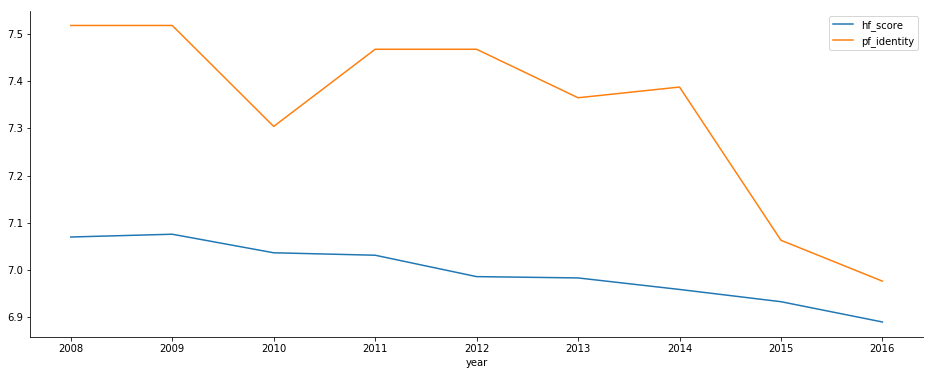

In [24]:
#Graficamos:

plt.figure(figsize=(16, 6))

x = dataset_ic_pivot_global.loc['hf_score'].index
y = dataset_ic_pivot_global.loc['hf_score'].values
seaborn.lineplot(x, y, label = 'hf_score')

x = dataset_ic_pivot_global.loc['pf_identity'].index
y = dataset_ic_pivot_global.loc['pf_identity'].values
seaborn.lineplot(x, y, label = 'pf_identity')

seaborn.despine()
plt.show()

In [25]:
#Lo que podemos observar en este grafico, es que para tanto para hf_score como pf_identity se visualiza
#una tendencia de disminucion de la media con el pasar de los años, .
#Remarcando que el campo pf_identity disminuye de manera mas ascelerada.

#### 2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

In [26]:
#Pivoteamos la data para generar registros con medias anuales por Región:

dataset_ic_pivot_region = pandas.pivot_table(dataset_ic,index = ['region'], values = ['hf_score', 'pf_identity'], columns = ['year'], aggfunc = numpy.mean)
dataset_ic_pivot_region.head()

hf_score                                \
year                               2008      2009      2010      2011   
region                                                                  
Caucasus & Central Asia        7.027743  7.025672  6.975023  6.819008   
East Asia                      7.741378  7.723779  7.769861  7.843124   
Eastern Europe                 7.710244  7.719634  7.696403  7.716152   
Latin America & the Caribbean  7.118196  7.113860  7.087213  7.084865   
Middle East & North Africa     6.342013  6.304318  6.259184  6.211953   

                                                                       \
year                               2012      2013      2014      2015   
region                                                                  
Caucasus & Central Asia        6.875845  6.846133  6.849528  6.772257   
East Asia                      7.828456  7.846940  7.862007  7.852107   
Eastern Europe                 7.692239  7.671658  7.675139  7.623544   
Latin America & the Caribbean  7.045974  7.037416  7.015536  6.979706   
Middle East & North Africa     6.076486  5.963931  5.915510  5.820231   

                                        pf_identity                        \
year                               2016        2008       2009       2010   
region                                                                      
Caucasus & Central Asia        6.773409    9.500000   9.500000   9.583333   
East Asia                      7.849527   10.000000  10.000000  10.000000   
Eastern Europe                 7.545715    9.880952   9.880952   9.880952   
Latin America & the Caribbean  6.954305    8.900000   8.900000   8.942308   
Middle East & North Africa     5.758610    3.653846   3.653846   2.941176   

                                                                           \
year                                2011       2012       2013       2014   
region                                                                      
Caucasus & Central Asia         8.750000   8.750000   8.055556   8.611111   
East Asia                      10.000000  10.000000  10.000000  10.000000   
Eastern Europe                  9.880952   9.880952   9.682540   9.761905   
Latin America & the Caribbean   9.038462   9.038462   9.134615   9.006410   
Middle East & North Africa      3.235294   3.235294   2.268519   2.361111   

                                                   
year                               2015      2016  
region                                             
Caucasus & Central Asia        7.972222  7.972222  
East Asia                      9.375000  9.375000  
Eastern Europe                 9.190476  9.136364  
Latin America & the Caribbean  7.919872  8.016026  
Middle East & North Africa     2.393519  2.267544

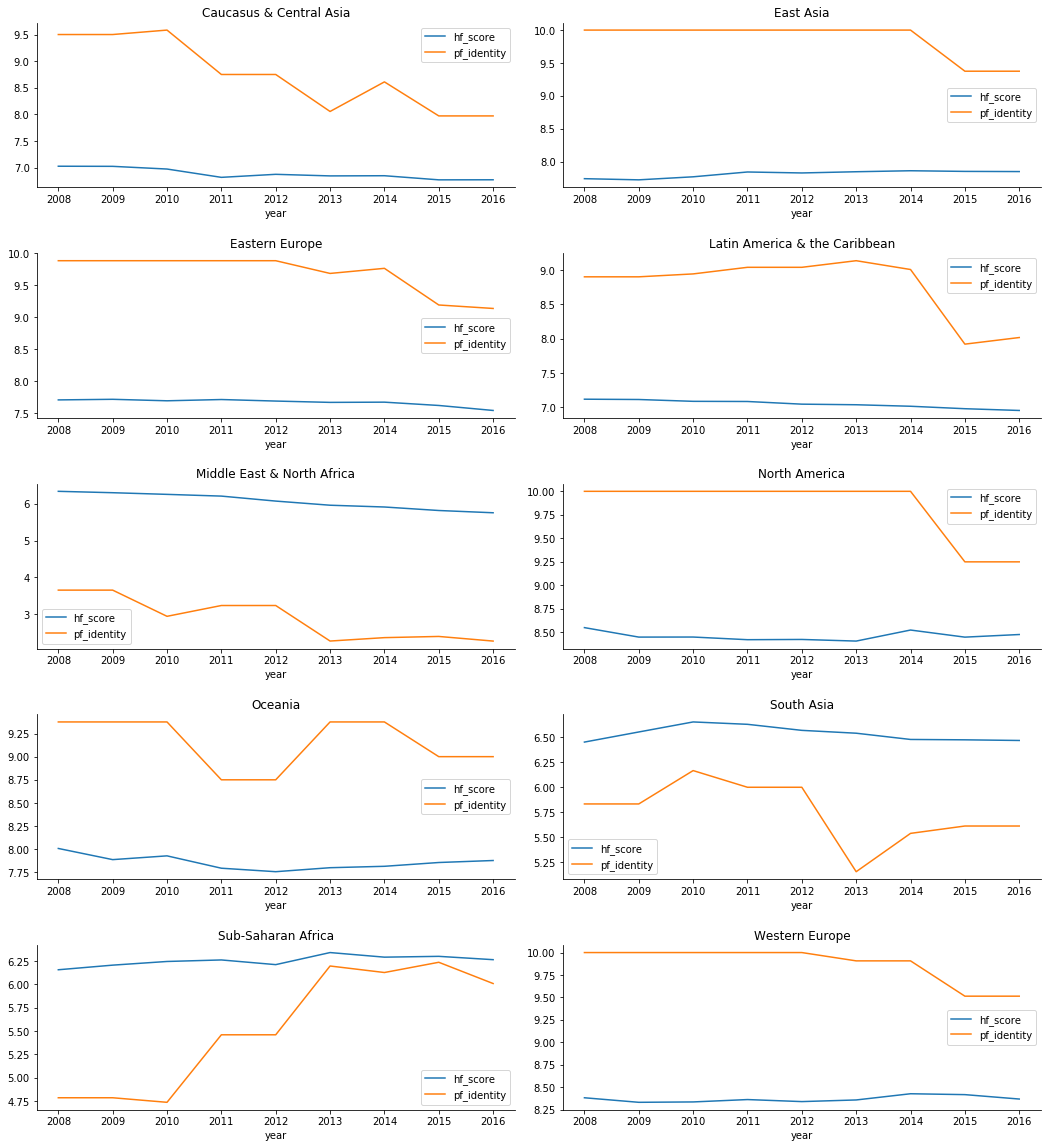

In [27]:
#Graficamos la tabla anterior.

fig, axes = plt.subplots(5, 2, figsize = (18, 20))
plt.subplots_adjust(hspace = 0.4, wspace = 0.1)
axes = axes.flatten()
seaborn.despine()

for i, vregion in enumerate(dataset_ic_pivot_region.index.values):
    axi = axes[i]
        
    x = dataset_ic_pivot_region.loc[vregion]['hf_score'].index
    y = dataset_ic_pivot_region.loc[vregion]['hf_score'].values
    seaborn.lineplot(x, y, label = 'hf_score', ax = axi)
    
    x = dataset_ic_pivot_region.loc[vregion]['pf_identity'].index
    y = dataset_ic_pivot_region.loc[vregion]['pf_identity'].values
    seaborn.lineplot(x, y, label = 'pf_identity', ax = axi).set_title(vregion)

In [28]:

#La tendecia observada en algunas Regiones difiere de la Global.
#Si tomamos como ejemplo Sub-Sharan Africa, vemos que hf_score, no tuvo mucha variacion, 
#pero tiene una media muy baja comparado Western Europe que tampoco tuvo tanta variacion en esa media.
#Con respecto al campo pf_identity, de esa misma region, se nota un notable crecimiento
#Pero la base de la misma es muy inferior a la media del resto de regiones.

#### 3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

In [29]:
#Pivoteamos la data para generar registros con medias anuales por países de Latin America & the Caribbean (graficamos todos):

dataset_ic_pivot_latin = pandas.pivot_table(dataset_ic[dataset_ic['region'] == 'Latin America & the Caribbean'],index = ['countries'], values = ['pf_identity'], columns = ['year'], aggfunc = numpy.mean)
dataset_ic_pivot_latin

pf_identity                                       \
year                       2008  2009  2010   2011   2012       2013   
countries                                                              
Argentina                  10.0  10.0  10.0  10.00  10.00  10.000000   
Bahamas                    10.0  10.0  10.0  10.00  10.00  10.000000   
Barbados                    5.0   5.0   5.0   5.00   5.00   5.000000   
Belize                      7.5   7.5   7.5   7.50   7.50   7.500000   
Bolivia                    10.0  10.0  10.0  10.00  10.00  10.000000   
Brazil                     10.0  10.0  10.0  10.00  10.00  10.000000   
Chile                      10.0  10.0  10.0  10.00  10.00   6.666667   
Colombia                   10.0  10.0  10.0  10.00  10.00  10.000000   
Costa Rica                 10.0  10.0  10.0  10.00  10.00   9.166667   
Dominican Rep.             10.0  10.0  10.0  10.00  10.00  10.000000   
Ecuador                    10.0  10.0  10.0  10.00  10.00  10.000000   
El Salvador                10.0  10.0  10.0  10.00  10.00  10.000000   
Guatemala                  10.0  10.0  10.0   6.25   6.25   8.333333   
Guyana                      5.0   5.0   5.0  10.00  10.00  10.000000   
Haiti                       7.5   7.5   7.5   6.25   6.25   7.500000   
Honduras                    7.5   7.5   7.5   8.75   8.75  10.000000   
Jamaica                     7.5   7.5   7.5   7.50   7.50   8.333333   
Mexico                     10.0  10.0  10.0  10.00  10.00  10.000000   
Nicaragua                  10.0  10.0  10.0   8.75   8.75   9.166667   
Panama                     10.0  10.0  10.0  10.00  10.00  10.000000   
Paraguay                   10.0  10.0  10.0  10.00  10.00  10.000000   
Peru                        7.5   7.5   7.5  10.00  10.00   9.166667   
Suriname                    NaN   NaN  10.0  10.00  10.00  10.000000   
Trinidad and Tobago         5.0   5.0   5.0   5.00   5.00   6.666667   
Uruguay                    10.0  10.0  10.0  10.00  10.00  10.000000   
Venezuela                  10.0  10.0  10.0  10.00  10.00  10.000000   

                                                      
year                      2014       2015       2016  
countries                                             
Argentina            10.000000  10.000000  10.000000  
Bahamas              10.000000  10.000000  10.000000  
Barbados              5.000000   5.000000   5.000000  
Belize                7.500000   7.500000  10.000000  
Bolivia              10.000000  10.000000  10.000000  
Brazil               10.000000   7.500000   7.500000  
Chile                 6.666667   5.000000   5.000000  
Colombia             10.000000  10.000000  10.000000  
Costa Rica            9.166667   6.875000   6.875000  
Dominican Rep.       10.000000   7.500000   7.500000  
Ecuador              10.000000  10.000000  10.000000  
El Salvador          10.000000   7.500000   7.500000  
Guatemala             8.333333   6.250000   6.250000  
Guyana                5.000000   5.000000   5.000000  
Haiti                 9.166667   6.875000   6.875000  
Honduras             10.000000   7.500000   7.500000  
Jamaica               8.333333   6.250000   6.250000  
Mexico               10.000000  10.000000  10.000000  
Nicaragua             9.166667   6.875000   6.875000  
Panama               10.000000   9.250000   9.250000  
Paraguay             10.000000   7.500000   7.500000  
Peru                  9.166667   9.375000   9.375000  
Suriname             10.000000  10.000000  10.000000  
Trinidad and Tobago   6.666667   6.666667   6.666667  
Uruguay              10.000000  10.000000  10.000000  
Venezuela            10.000000   7.500000   7.500000

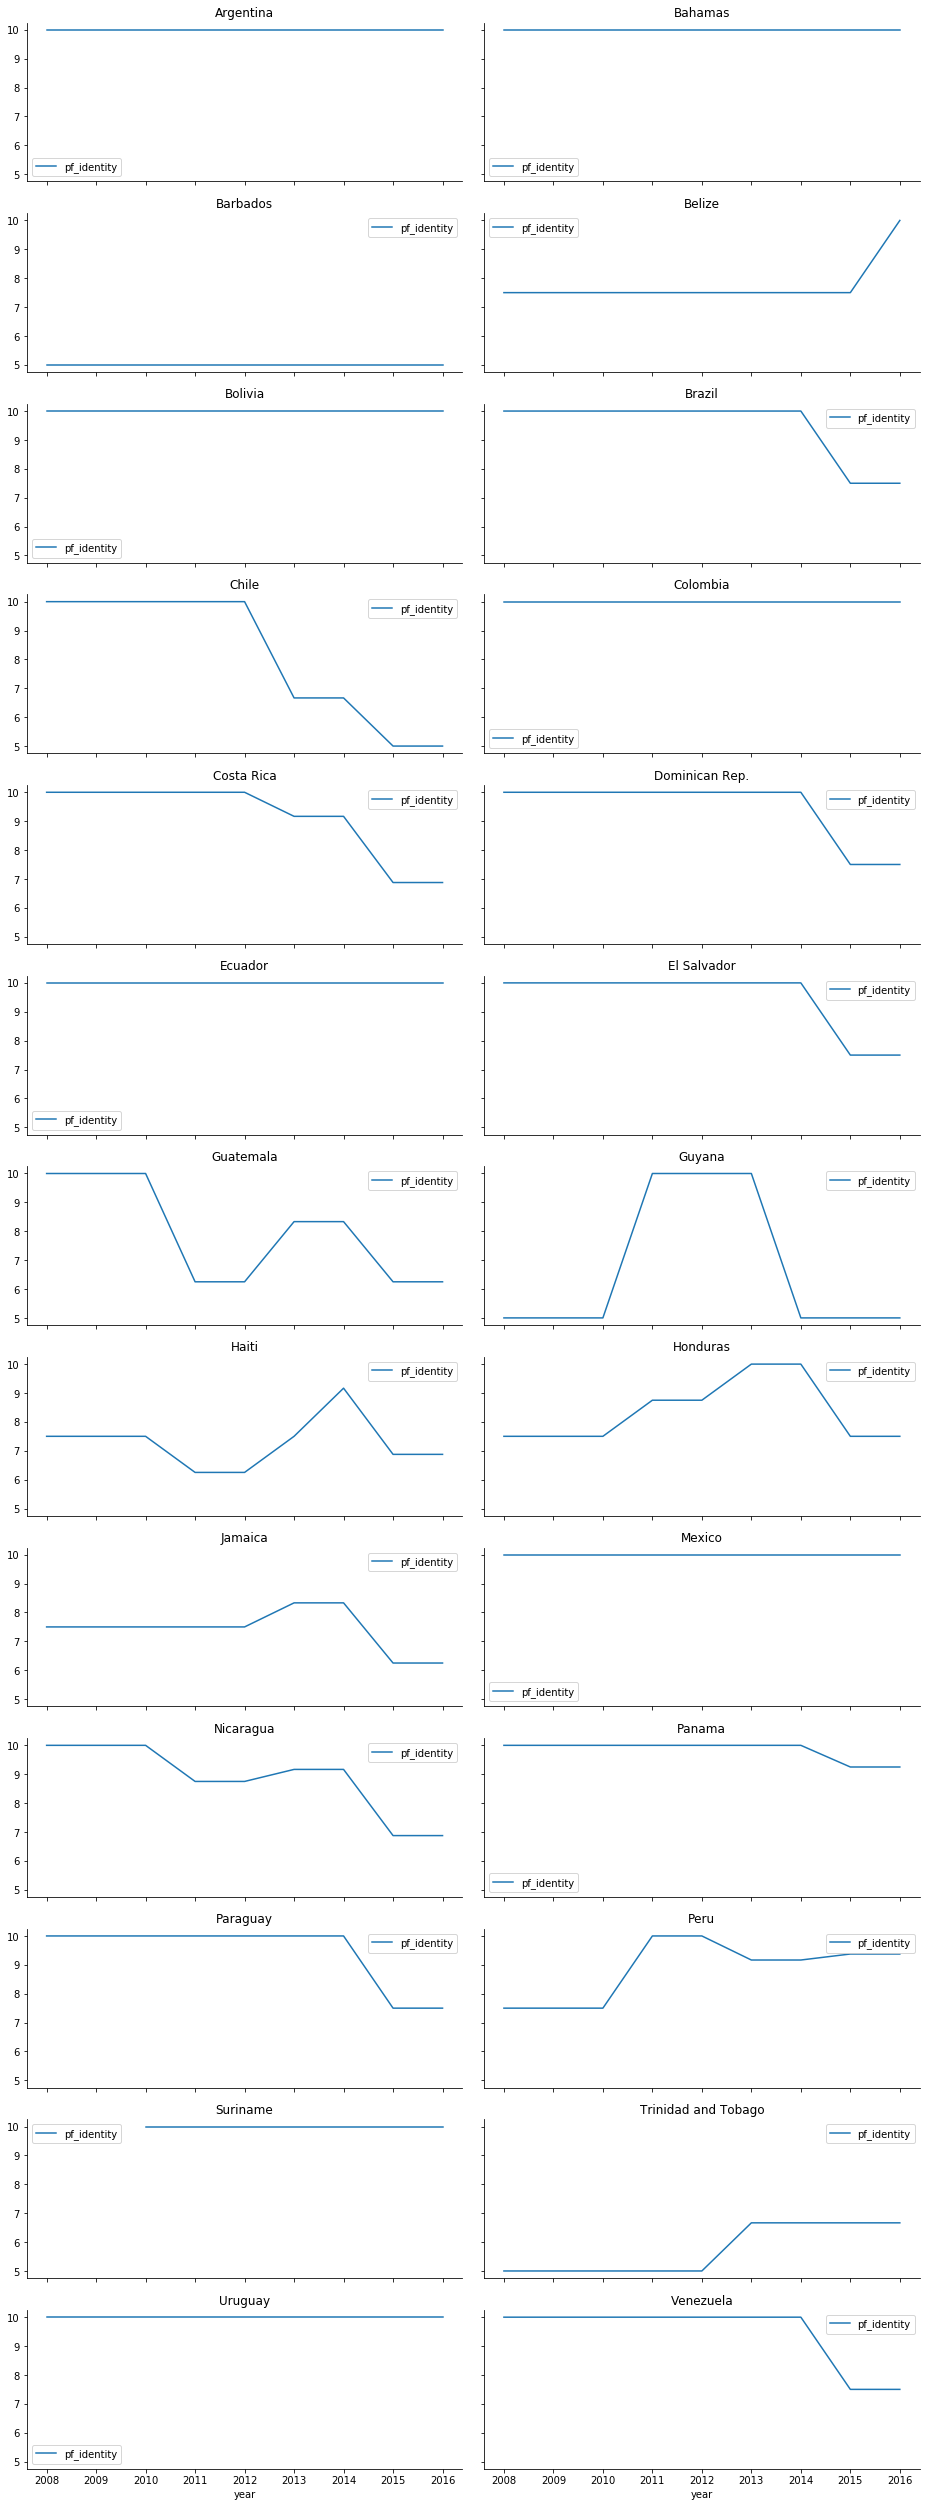

In [30]:
#Graficamos la tabla anterior.

fig, axes = plt.subplots(13, 2, figsize = (16, 45), sharex = True, sharey = True)
plt.subplots_adjust(hspace = 0.2, wspace = 0.05)
axes = axes.flatten()
seaborn.despine()

for i, countries in enumerate(dataset_ic_pivot_latin.index.values):
    axi = axes[i]
        
    x = dataset_ic_pivot_latin.iloc[i].pf_identity.index
    y = dataset_ic_pivot_latin.iloc[i].pf_identity.values
    
    seaborn.lineplot(x, y, label = 'pf_identity', ax = axi).set_title(countries)


In [31]:
#Optamos observar la totalidad de los países.
#Lo que podemos observar de los mismos, es que la mayoria de paises de latinoamerica, a traves de los años
#no tienen mucha variacion en la media del pf_identity.
#Por otro lado, Paraguay y Venezuela tiene un descenso no tan pronunciado.
#Chile es el pais con mayor descenso en su media de America del Sur.

#### Hint: hay un gráfico de seaborn que hace todo por vos!

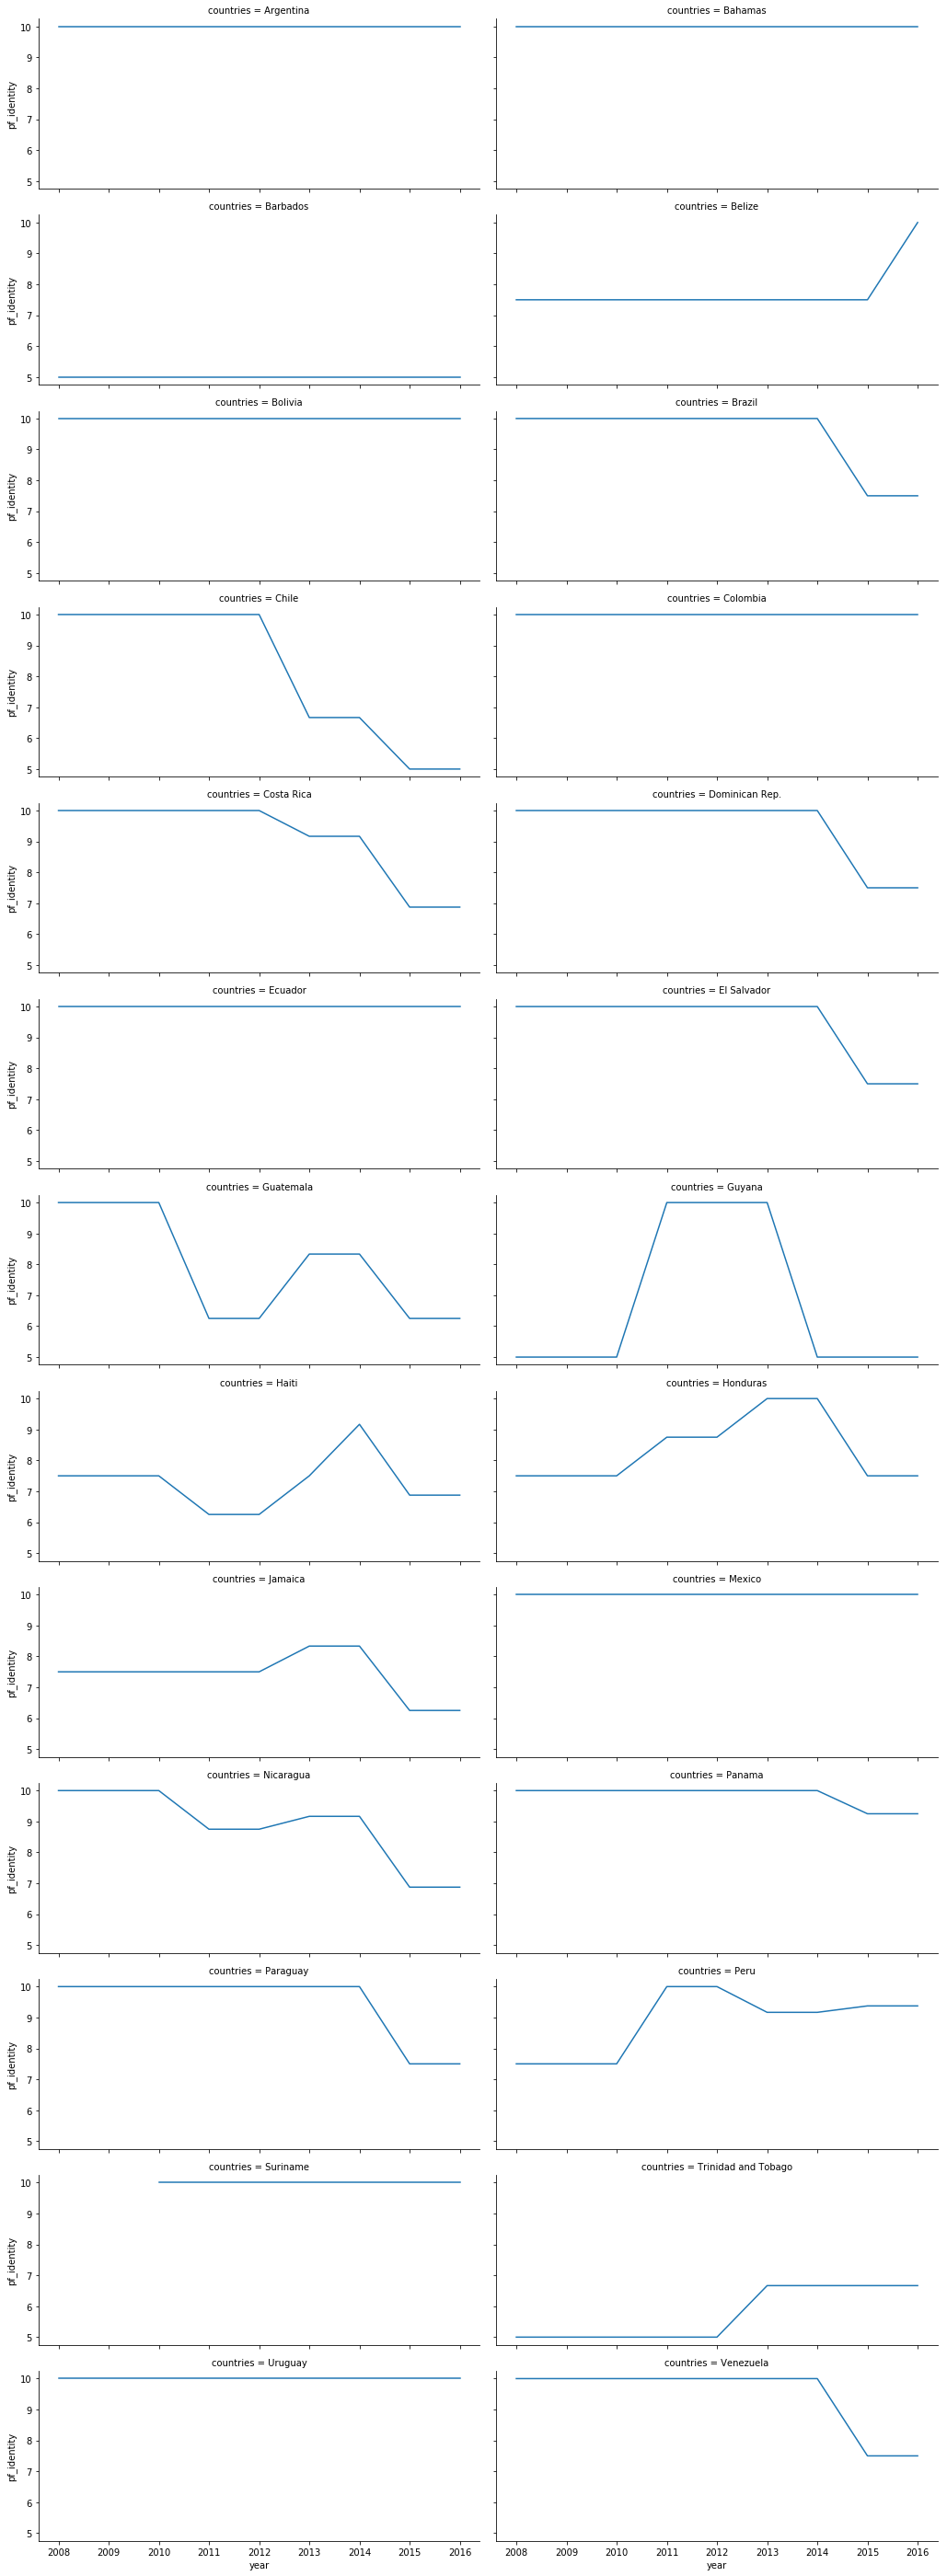

In [32]:
#... idem anterior pero utilizando menos líneas de código.

dataset_ic_latin = dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']

fig = seaborn.FacetGrid(dataset_ic_latin, col = 'countries', col_wrap = 2, aspect = 2.4)
fig = fig.map(plt.plot, 'year', 'pf_identity')

#### Sólo por curiosidad, graficar la tendencia de hf_score y ef_score a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

In [33]:
#Pivoteamos la data para generar registros con medias anuales:

dataset_ic_pivot_latin2 = pandas.pivot_table(dataset_ic[dataset_ic['region'] == 'Latin America & the Caribbean'], values = ['hf_score', 'ef_score'], columns = ['year'], aggfunc = numpy.mean)
dataset_ic_pivot_latin2

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
ef_score,6.768000,6.77360,6.723846,6.763462,6.740769,6.740000,6.710769,6.717308,6.678846
hf_score,7.118196,7.11386,7.087213,7.084865,7.045974,7.037416,7.015536,6.979706,6.954305


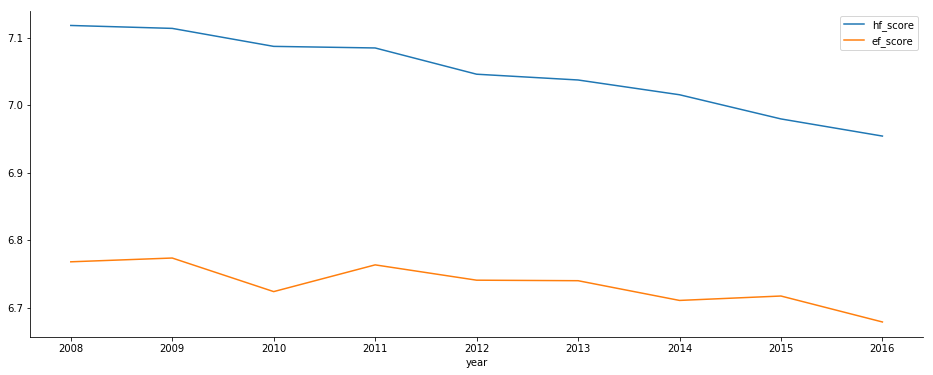

In [34]:
#Graficamos:

plt.figure(figsize=(16, 6))

x = dataset_ic_pivot_latin2.loc['hf_score'].index
y = dataset_ic_pivot_latin2.loc['hf_score'].values
seaborn.lineplot(x, y, label = 'hf_score')

x = dataset_ic_pivot_latin2.loc['ef_score'].index
y = dataset_ic_pivot_latin2.loc['ef_score'].values
seaborn.lineplot(x, y, label = 'ef_score')

seaborn.despine()
plt.show()

In [35]:
#Se observa que en el retroceso de hf_score también influye el retroceso de ef_score,
#las variables correlacionan de modo positivo.


## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

#### 1. Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

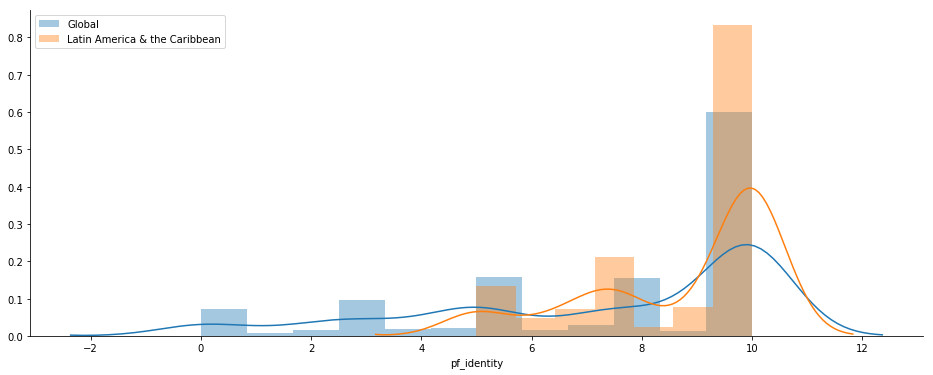

In [36]:
#Histogramas para pf_identity:

plt.figure(figsize=(16, 6))

seaborn.distplot(dataset_ic['pf_identity'].dropna(), label = 'Global')
seaborn.distplot(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna(), label = 'Latin America & the Caribbean')

seaborn.despine()
plt.legend()
plt.show()

In [37]:
#pf_identity

#Observamos que el campo pf_identity, tanto a nivel mundial como latinoamerica tiene la media en 10
#y forman una curva de distribucion normal, cuya su asimetría es negativa. (CAF menor a 0).
#Sus colas de distribución se alargan a la izquierda, valores inferiores a su media
#(CAF menor a 0), su asimetría es negativa.
#A nivel mundial presenta una mayor asimetria que a nivel latinomerica y el caribe

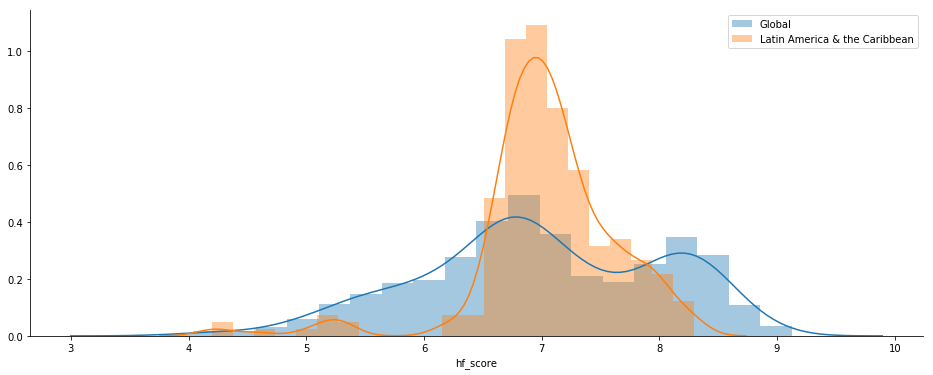

In [38]:
#Histogramas para hf_score:

plt.figure(figsize=(16, 6))

seaborn.distplot(dataset_ic['hf_score'].dropna(), label = 'Global')
seaborn.distplot(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['hf_score'].dropna(), label = 'Latin America & the Caribbean')

seaborn.despine()
plt.legend()
plt.show()

In [39]:

#Para la variable hf_score: 

#Sus colas de distribución se presentan más simétricas (CAF se aproximan a 0).

#Observamos distribuciones bimodales: pf_identity Latina y hf_score Global. 

#A nivel mundia existe una media distina que a nivel Latinoamerica y el Caribe
#Latinoamerica y el Caribe posee una distribucion mayor de valores cercanos a la media que la muestra a nivel global

In [40]:
#No utilizamos TODOS los registros, eliminamos los NaN.

#### 2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [41]:
#Kolmogorov-Smirnof (Test KS):

from scipy import stats

pf_identity_global = stats.zscore(dataset_ic['pf_identity'].dropna())
print('Para pf_identity Global:',stats.kstest(pf_identity_global, 'norm'))
pf_identity_latin = stats.zscore(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna())
print('Para pf_identity Latin:',stats.kstest(pf_identity_latin, 'norm'))

print()

hf_score_global = stats.zscore(dataset_ic['hf_score'].dropna())
print('Para hf_score Global:',stats.kstest(hf_score_global, 'norm'))
hf_score_latin = stats.zscore(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())
print('Para hf_score Latin:',stats.kstest(hf_score_latin, 'norm'))

Para pf_identity Global: KstestResult(statistic=0.2368216885475004, pvalue=1.7837097494493251e-68)
Para pf_identity Latin: KstestResult(statistic=0.3513672528496658, pvalue=4.08023938470139e-26)

Para hf_score Global: KstestResult(statistic=0.06606589707833843, pvalue=1.1309978419994058e-05)
Para hf_score Latin: KstestResult(statistic=0.15003247403280606, pvalue=5.043599840583937e-05)


In [42]:
#Leemos pvalor como valor float:

print('hf_score Global (pvalor): %2.10f' % float(stats.kstest(hf_score_global, 'norm')[1]))
print('hf_score  Latin (pvalor): %2.10f' % float(stats.kstest(hf_score_latin, 'norm')[1]))

hf_score Global (pvalor): 0.0000113100
hf_score  Latin (pvalor): 0.0000504360


In [43]:
#El test Kolmogorov Smirnov rechaza la hipótesis nula por ser pvalor menos al nivel de significancia.

#### 3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar ambas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.

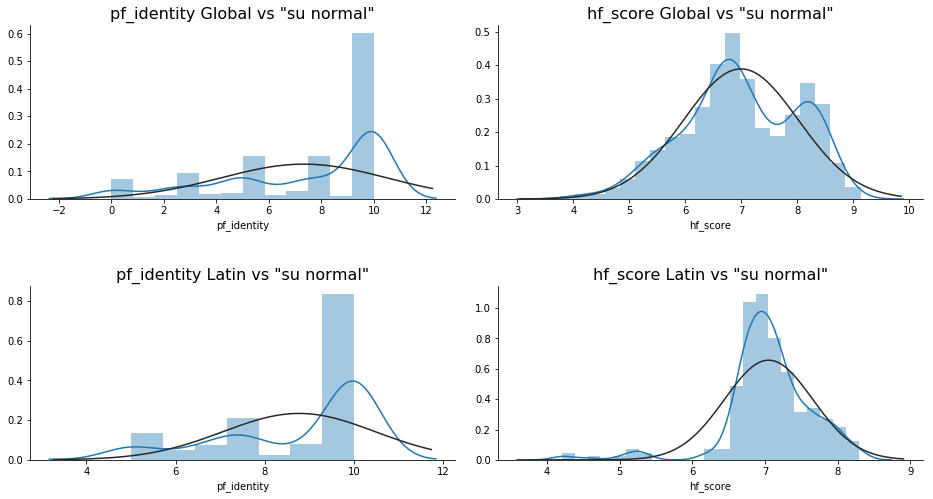

In [44]:
#Comparamos pf_identity_global y hf_score_global con sus "normales".

fig, axes = plt.subplots(2, 2, figsize = (16, 8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.1)
                         
seaborn.distplot(dataset_ic['pf_identity'].dropna(), fit = stats.norm, ax = axes[0,0]).set_title('pf_identity Global vs "su normal"', fontsize = 16)
seaborn.distplot(dataset_ic['hf_score'].dropna(), fit = stats.norm, ax = axes[0,1]).set_title('hf_score Global vs "su normal"', fontsize = 16)

seaborn.distplot(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna(), fit = stats.norm, ax = axes[1,0]).set_title('pf_identity Latin vs "su normal"', fontsize = 16)
seaborn.distplot(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['hf_score'].dropna(), fit = stats.norm, ax = axes[1,1]).set_title('hf_score Latin vs "su normal"', fontsize = 16)

seaborn.despine()

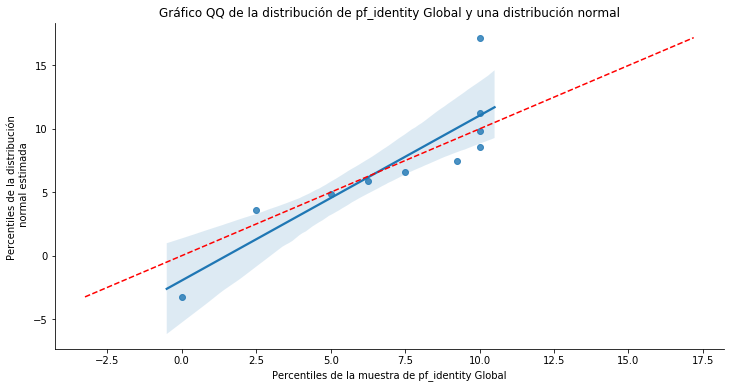

In [45]:
#Gráfico QQ para pf_identity Global:

loc, scale = stats.norm.fit(dataset_ic['pf_identity'].dropna())
norm_dist = stats.norm(loc, scale)

percs = numpy.linspace(0,100,10)  # Creamos 10 puntos percentiles igualmente distribuidos entre 0 y 100.

pf_identity_global_sample = numpy.percentile(dataset_ic['pf_identity'].dropna(), percs)
pf_identity_global_norm = numpy.percentile(norm_dist.rvs(len(dataset_ic['pf_identity'].dropna())), percs)

plt.figure(figsize=(12,6))

seaborn.regplot(x = pf_identity_global_sample, y = pf_identity_global_norm)

plt.xlabel('Percentiles de la muestra de pf_identity Global')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity Global y una distribución normal')

x = numpy.linspace(numpy.min((pf_identity_global_sample.min(), pf_identity_global_norm.min())), numpy.max((pf_identity_global_sample.max(), pf_identity_global_norm.max())))
plt.plot(x,x, color='r', ls="--")

seaborn.despine()

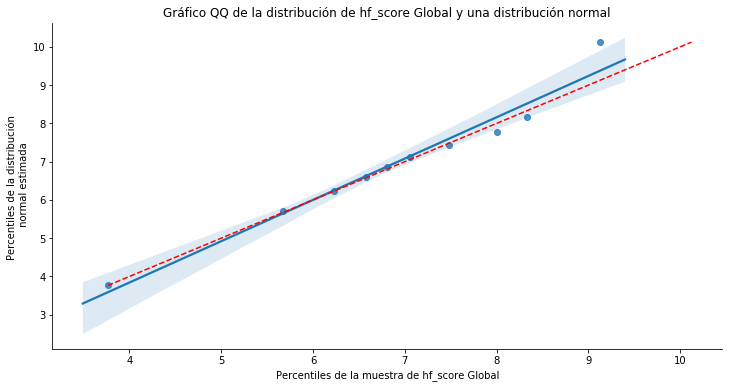

In [46]:
#Gráfico QQ para hf_score Global:

loc, scale = stats.norm.fit(dataset_ic['hf_score'].dropna())
norm_dist = stats.norm(loc, scale)

percs = numpy.linspace(0,100,10)  # Creamos 10 puntos percentiles igualmente distribuidos entre 0 y 100.

hf_score_global_sample = numpy.percentile(dataset_ic['hf_score'].dropna(), percs)
hf_score_global_norm = numpy.percentile(norm_dist.rvs(len(dataset_ic['hf_score'].dropna())), percs)

plt.figure(figsize=(12,6))

seaborn.regplot(x = hf_score_global_sample, y = hf_score_global_norm)

plt.xlabel('Percentiles de la muestra de hf_score Global')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score Global y una distribución normal')

x = numpy.linspace(numpy.min((hf_score_global_sample.min(), hf_score_global_norm.min())), numpy.max((hf_score_global_sample.max(), hf_score_global_norm.max())))
plt.plot(x, x, color='r', ls="--")

seaborn.despine()

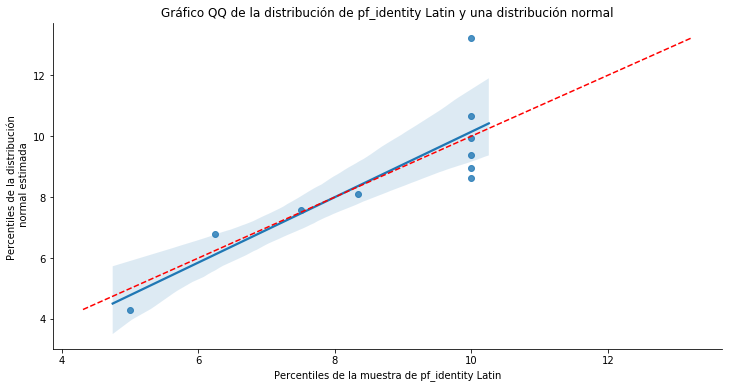

In [47]:
#Gráfico QQ para pf_identity Latin:

loc, scale = stats.norm.fit(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna())
norm_dist = stats.norm(loc, scale)

percs = numpy.linspace(0,100,10)  # Creamos 10 puntos percentiles igualmente distribuidos entre 0 y 100.

pf_identity_latin_sample = numpy.percentile(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna(), percs)
pf_identity_latin_norm = numpy.percentile(norm_dist.rvs(len(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna())), percs)

plt.figure(figsize=(12,6))

seaborn.regplot(x = pf_identity_latin_sample, y = pf_identity_latin_norm)

plt.xlabel('Percentiles de la muestra de pf_identity Latin')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity Latin y una distribución normal')

x = numpy.linspace(numpy.min((pf_identity_latin_sample.min(), pf_identity_latin_norm.min())), numpy.max((pf_identity_latin_sample.max(),pf_identity_latin_norm.max())))
plt.plot(x,x, color='r', ls="--")

seaborn.despine()

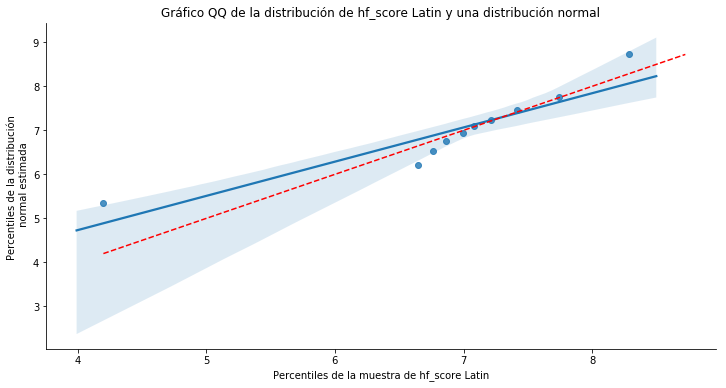

In [48]:
#Gráfico QQ para hf_score Latin:

loc, scale = stats.norm.fit(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())
norm_dist = stats.norm(loc, scale)

percs = numpy.linspace(0,100,10)  # Creamos 10 puntos percentiles igualmente distribuidos entre 0 y 100.

hf_score_latin_sample = numpy.percentile(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['hf_score'].dropna(), percs)
hf_score_latin_norm = numpy.percentile(norm_dist.rvs(len(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())), percs)

plt.figure(figsize=(12,6))

seaborn.regplot(x = hf_score_latin_sample, y = hf_score_latin_norm)

plt.xlabel('Percentiles de la muestra de hf_score Latin')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score Latin y una distribución normal')

x = numpy.linspace(numpy.min((hf_score_latin_sample.min(), hf_score_latin_norm.min())), numpy.max((hf_score_latin_sample.max(), hf_score_latin_norm.max())))
plt.plot(x,x, color='r', ls="--")

seaborn.despine()

#### 4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [49]:
#Asimetría y Curtosis de pf_identity Global:
print('pf_identity Global:')
print(stats.skew(dataset_ic['pf_identity'].dropna()), '(Asimetría)')
print(stats.kurtosis(dataset_ic['pf_identity'].dropna()), '(Curtosis)')
print()

#Asimetría y Curtosis de hf_score Global:
print('hf_score Global:')
print(stats.skew(dataset_ic['hf_score'].dropna()), '(Asimetría)')
print(stats.kurtosis(dataset_ic['hf_score'].dropna()), '(Curtosis)')
print()

#Asimetría y Curtosis de pf_identity Latin:
print('pf_identity Latin:')
print(stats.skew(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna()), '(Asimetría)')
print(stats.kurtosis(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna()), '(Curtosis)')
print()

#Asimetría y Curtosis de hf_score Latin:
print('hf_score Latin:')
print(stats.skew(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['hf_score'].dropna()), '(Asimetría)')
print(stats.kurtosis(dataset_ic.loc[dataset_ic['region'] == 'Latin America & the Caribbean']['hf_score'].dropna()), '(Curtosis)')
 

pf_identity Global:
-0.9121780542847563 (Asimetría)
-0.4148322234251629 (Curtosis)

hf_score Global:
-0.21205190437691196 (Asimetría)
-0.5101904315124792 (Curtosis)

pf_identity Latin:
-1.0478440216224703 (Asimetría)
-0.2953048553672586 (Curtosis)

hf_score Latin:
-1.442092151332142 (Asimetría)
5.340188962725749 (Curtosis)


In [50]:
#Los valores de asimetría y curtosis confirman distribuciones no normales (los valores son distintos a cero).
#Estos estadísticos completan al QQ plot, dan sentido de aproximación a una distribución normal.

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


#### 1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

C:\Users\E92890749\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\E92890749\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


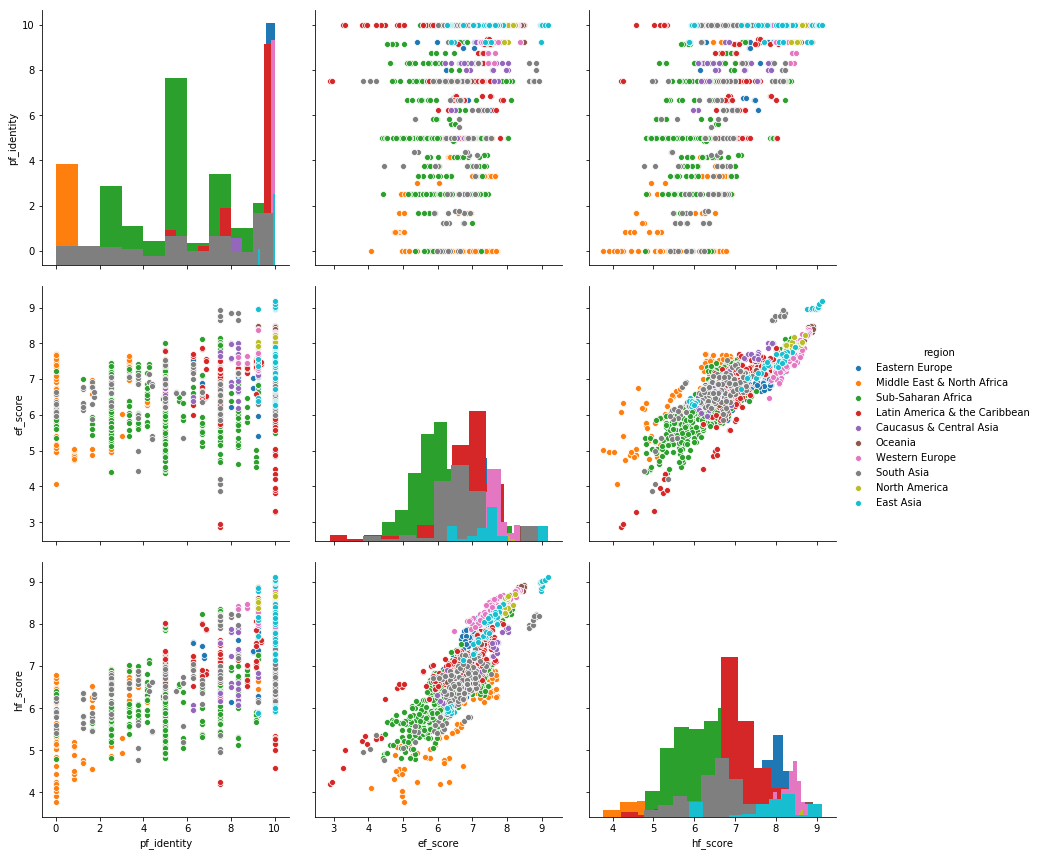

In [51]:
#

seaborn.pairplot(data=dataset_ic, vars = ['pf_identity', 'ef_score', 'hf_score'], height = 4, hue = 'region', diag_kind = 'hist')

plt.show()

In [52]:
#Los gráficos muestran distintos grados de concentración y dispersión de puntos mostrando que la relación entre
#hf_score y ef_score es fuerte y creciente, no pudiendo decir lo mismo sobre pf_identity.

#### 2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.

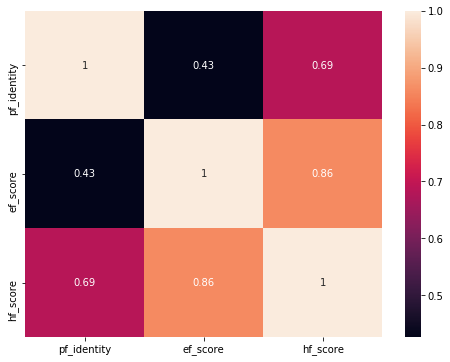

In [53]:
#
plt.figure(figsize=(8, 6))

seaborn.heatmap(dataset_ic[['pf_identity', 'ef_score', 'hf_score']].corr(method = 'spearman'), annot=True)

plt.show()

In [54]:
#El coheficiente de Pearson aplica a distribuciones Normales y nuestros casos se alejan de serlo.
#El coheficiente de Tau / Kendal aplica sobre variables cualitativas ordinales o de razón...
#... prestamos atención al coheficiente de Spearman.

#### 3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.

In [55]:
#Coheficientes entre pf_identity y hf_score.
print('Pearson  entre pf_identity y hf_score:',dataset_ic.corr(method='pearson')['pf_identity']['hf_score'])
print('Spearman entre pf_identity y hf_score:',dataset_ic.corr(method='spearman')['pf_identity']['hf_score'])
print('Kendall  entre pf_identity y hf_score:',dataset_ic.corr(method='kendall')['pf_identity']['hf_score'])
print()
#Coheficientes entre pf_identity y ef_score.
print('Pearson  entre pf_identity y ef_score:',dataset_ic.corr(method='pearson')['pf_identity']['ef_score'])
print('Spearman entre pf_identity y ef_score:',dataset_ic.corr(method='spearman')['pf_identity']['ef_score'])
print('Kendall  entre pf_identity y ef_score:',dataset_ic.corr(method='kendall')['pf_identity']['ef_score'])
print()
#Coheficientes entre hf_score y ef_score.
print('Pearson  entre hf_score y ef_score:',dataset_ic.corr(method='pearson')['hf_score']['ef_score'])
print('Spearman entre hf_score y ef_score:',dataset_ic.corr(method='spearman')['hf_score']['ef_score'])
print('Kendall  entre hf_score y ef_score:',dataset_ic.corr(method='kendall')['hf_score']['ef_score'])


Pearson  entre pf_identity y hf_score: 0.6777541950437723
Spearman entre pf_identity y hf_score: 0.686109421203919
Kendall  entre pf_identity y hf_score: 0.5213095523555771

Pearson  entre pf_identity y ef_score: 0.3888772379714594
Spearman entre pf_identity y ef_score: 0.42699347529764203
Kendall  entre pf_identity y ef_score: 0.3081198391156437

Pearson  entre hf_score y ef_score: 0.8548651479506567
Spearman entre hf_score y ef_score: 0.8606467585473371
Kendall  entre hf_score y ef_score: 0.6810620232345694


In [56]:
#Las correlaciones entre las variables son positivas, da a entender que crecen en la misma dirección, pero no
#con la misma intensidad: entre hf_score y ef_score es fuerte, pero no ocurre lo mismo entre pf_identity y las anteriores.
#ef_score y pf_identity suman al crecimiento de hf_score pero no con la misma fuerza.

#### 4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable region es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)

In [57]:
#